In [2]:

# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''

# Specifying the folder where images are present
TrainingImagePath='/content/drive/MyDrive/Colab Notebooks/DLNN Lab/Assign 4/Final Training Images'

In [3]:
!pip install tensorflow
!pip install keras


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator()

In [6]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 244 images belonging to 16 classes.


In [7]:
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 244 images belonging to 16 classes.


In [8]:
# Printing class labels for each face
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [9]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

In [10]:
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName


In [11]:
# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

In [12]:
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


In [13]:
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  16


In [14]:
'''######################## Create CNN deep learning model ########################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [15]:
#Initializing the Convolutional Neural Network
classifier= Sequential()

In [16]:
''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
'''# STEP--3 FLattening'''
classifier.add(Flatten())
'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [19]:
#import time
# Measuring the time taken by the model to train
#StartTime=time.time()

history = classifier.fit(
    training_set,
    steps_per_epoch=30,
    epochs=10,
    validation_data=test_set,
    validation_steps=10
)

#EndTime=time.time()
#print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

Epoch 1/10
 2/30 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.0288 - loss: 208.6706    

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.0528 - loss: 79.9206 - val_accuracy: 0.0738 - val_loss: 2.9266
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1031 - loss: 2.7812 - val_accuracy: 0.1434 - val_loss: 2.6984
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.1486 - loss: 2.6026 - val_accuracy: 0.2295 - val_loss: 2.3924
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3736 - loss: 2.1735 - val_accuracy: 0.3811 - val_loss: 2.0315
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4663 - loss: 1.8510 - val_accuracy: 0.5697 - val_loss: 1.3607
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6117 - loss: 1.3391 - val_accuracy: 0.8197 - val_loss: 0.7376
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7381 - loss: 0.9393 - val_accuracy: 0.7992 - val_loss: 0.6565
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7889 - loss: 0.8219 - val_accuracy: 0.9221 - val_loss: 

In [21]:
import matplotlib.pyplot as plt

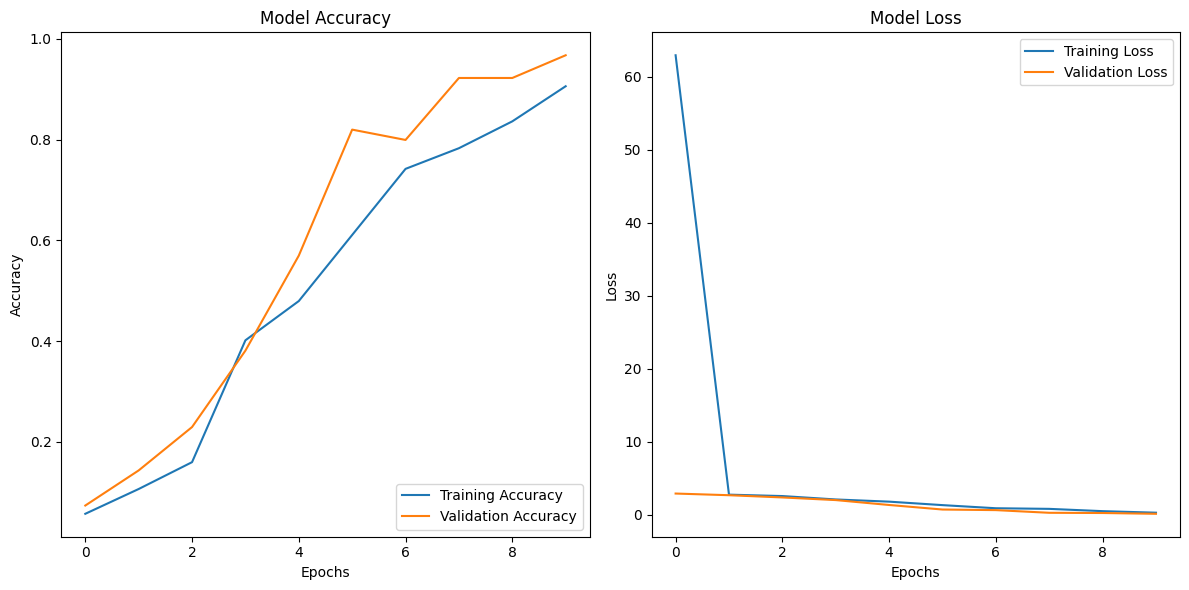

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

In [23]:

from keras.preprocessing import image
import numpy as np

In [24]:
ImagePath = '/content/drive/MyDrive/Colab Notebooks/DLNN Lab/Assign 4/Final Testing Images/face1/1face1.jpg'

# Load and preprocess the image
test_image = image.load_img(ImagePath, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

In [25]:
# Predict the image
result = classifier.predict(test_image_array, verbose=0)
predicted_label = ResultMap[np.argmax(result)]

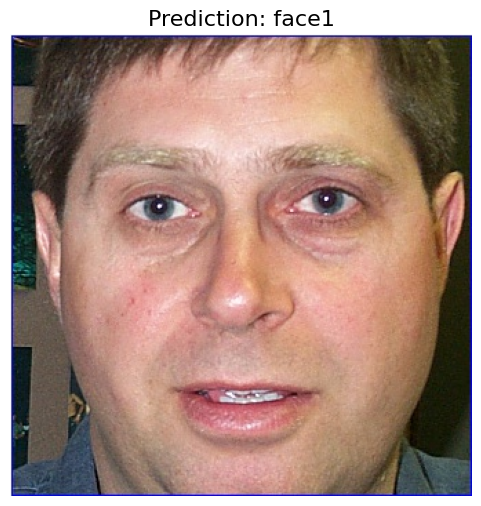

In [26]:
# Display the image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(image.load_img(ImagePath))
plt.title(f'Prediction: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

In [27]:
print('####' * 10)
print('Prediction is: ', predicted_label)

########################################
Prediction is:  face1
